In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Line plot

#### plot 함수
- 선 그래프를 그려주는 함수

In [5]:
np.random.seed(3)
x = np.arange(1, 6) #1 ~ 5
y = np.random.randint(1, 10, size = 5)
print(x)
print(y)


[1 2 3 4 5]
[9 4 9 9 1]


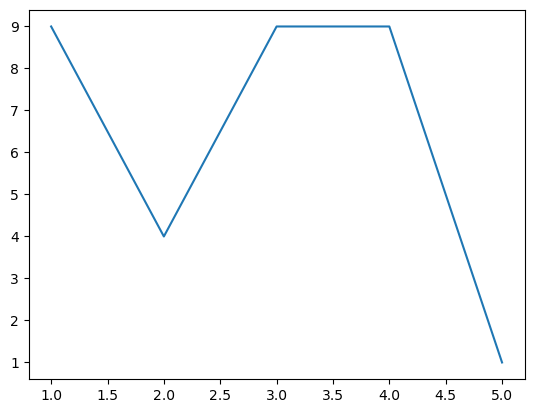

In [7]:
plt.plot(x, y)
plt.show() # 그래프를 그려줘

#### Line plot 다양한 옵션들

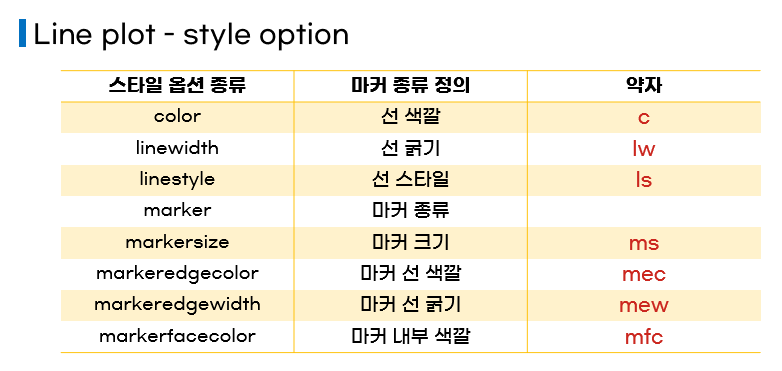
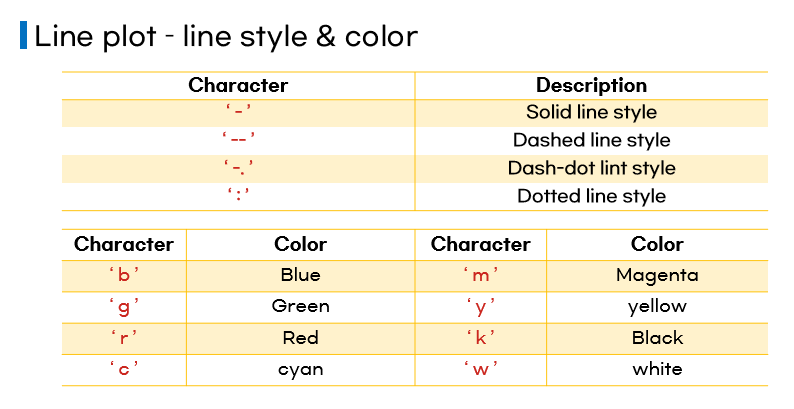
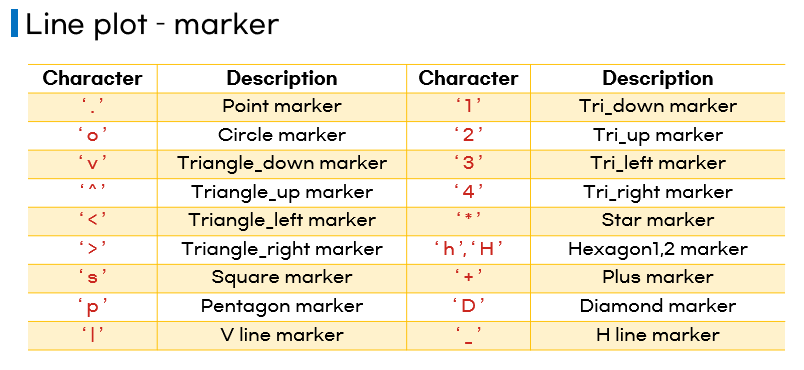

In [11]:
# matplotlib 에서 지원되는 색상 목록
# https://matplotlib.org/stable/gallery/color/named_colors.html#base-colors doc 
# 제공 코드

import math
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value, and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(colors[c]))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

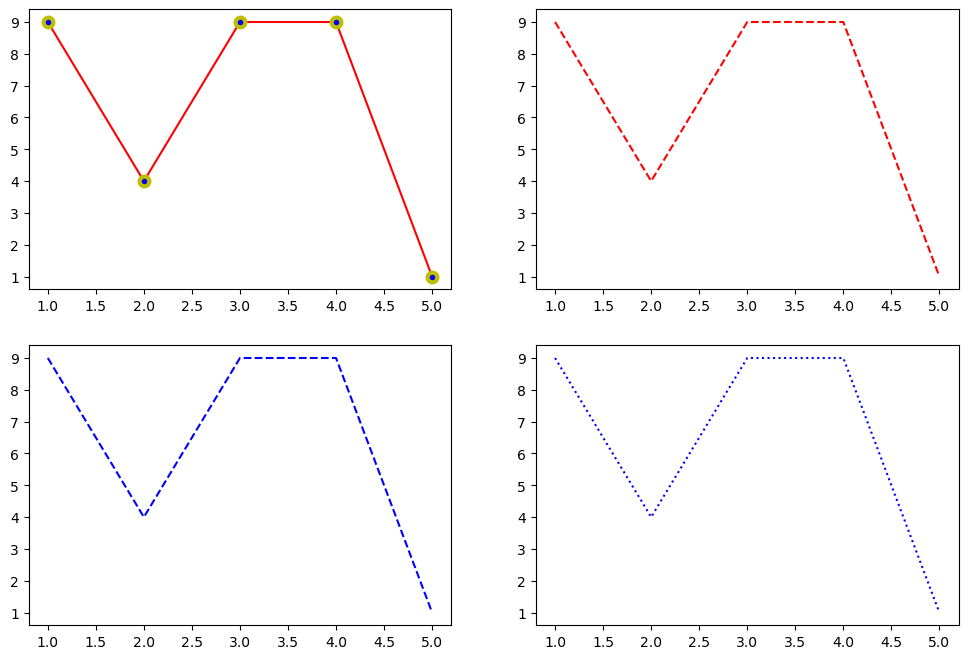

In [32]:
# 선 스타일 변경해보기
plt.figure(figsize = (12, 8)) # figsize 단위 : inch 
plt.subplot(2, 2, 1) #2행 2열 1번째 그래프
plt.plot(x, y, ls = '-', color = 'r', marker = 'o', ms = 7, mec = 'y', mew = 3, mfc = 'b')

plt.subplot(2, 2, 2)

plt.plot(x, y, ls = '--', color = 'r', ms = 7, mec = 'y', mew = 3, mfc = 'b')
plt.subplot(2, 2, 3)

plt.plot(x, y, ls = '--', color = 'b', ms = 7, mec = 'y', mew = 3, mfc = 'b')
plt.subplot(2, 2, 4)

plt.plot(x, y, ls = ':', color = 'b', ms = 7, mec = 'y', mew = 3, mfc = 'b')
plt.show() # plt.show() 한개에 모두 출력한다




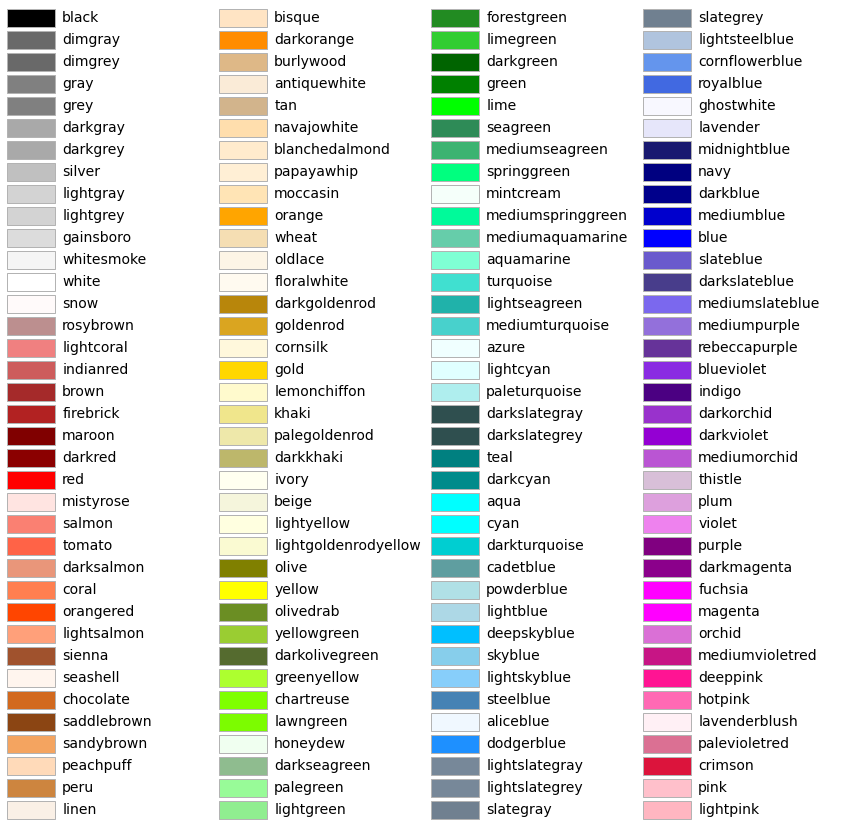

In [33]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

#### show() 사용하기

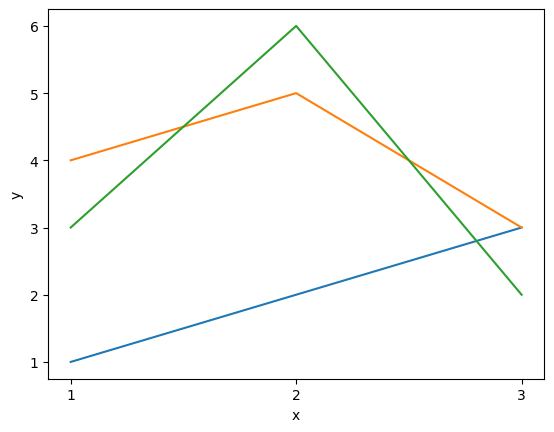

In [42]:
# 여러개의 그래프를 한 창에 그리기
x = np.arange(1, 4)   # 1, 2, 3
y1 = np.array([1, 2, 3])
y2 = np.array([4, 5, 3])
y3 = np.array([3, 6, 2])

plt.plot(x, y1) 
plt.plot(x, y2)
plt.plot(x, y3)
plt.xticks(range(1,4)) #
plt.xticks(x)
plt.xlabel('x')
plt.ylabel('y')

plt.show()   # 하나의 도화지

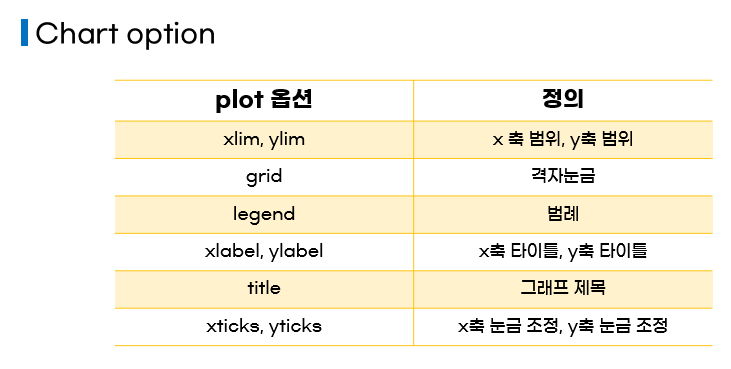

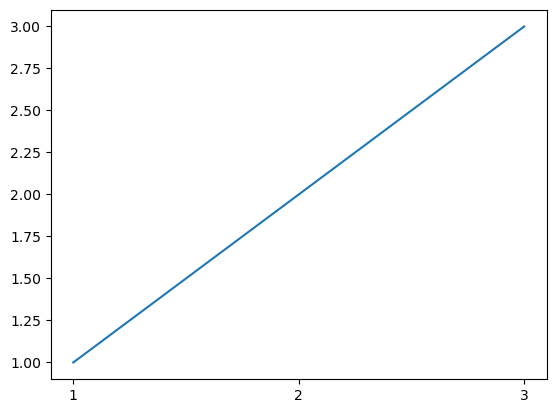

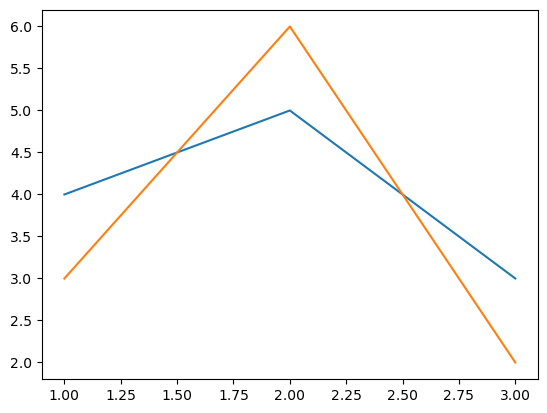

In [49]:
# 여러 창으로 그래프를 나눠서 그리기
plt.plot(x, y1)
plt.xticks(x)
plt.show()

plt.plot(x, y2)
plt.plot(x, y3)

plt.show()

Text(0.5, 1.0, '<y3>')

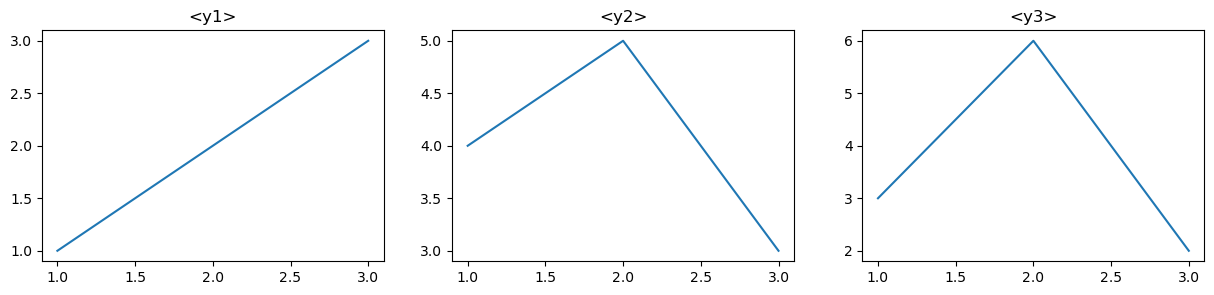

In [59]:
# subplot --> 1창에 칸 나눠서 3개의 그래프를 표현

plt.figure(figsize = (15, 3))

plt.subplot(1, 3, 1)
plt.plot(x, y1)
plt.title('<y1>')

plt.subplot(1, 3, 2)
plt.plot(x, y2)
plt.title('<y2>')

plt.subplot(1, 3, 3)
plt.plot(x, y3)
plt.title('<y3>')



#### 인구 데이터 실습
- kosis 국가통계포털 장래 인구변동 데이터
- 년도별 출생아수, 사망자수 정보를 가지고와서 line plot 시각화

In [63]:
# 데이터 불러오기
# encoding='euc-kr' 인코딩 방식이 없으며 오류   'utf-8'코덱 오류
data = pd.read_csv('./data/장래_인구변동_KOSIS.csv', encoding='euc-kr', index_col='인구변동요인별')
data

,2020,2030,2040,2050,2060,2070
인구변동요인별,,,,,,
인구(천명),51836,51199,50193,47359,42617,37656
출생아수(천명),275,305,286,236,181,196
사망자수(천명),308,408,527,680,741,702


In [64]:
# 데이터 정보 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 인구(천명) to 사망자수(천명)
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2020    3 non-null      int64
 1   2030    3 non-null      int64
 2   2040    3 non-null      int64
 3   2050    3 non-null      int64
 4   2060    3 non-null      int64
 5   2070    3 non-null      int64
dtypes: int64(6)
memory usage: 168.0+ bytes


In [65]:
data.index

Index(['인구(천명)', '출생아수(천명)', '사망자수(천명)'], dtype='object', name='인구변동요인별')

In [68]:
data.iloc[1]

2020    275
2030    305
2040    286
2050    236
2060    181
2070    196
Name: 출생아수(천명), dtype: int64

In [115]:
x=data.columns

In [134]:
# 연도 정보
x = list(range(2020, 2071, 10))

# x = range(2020, 2071, 10)

# 출생아수 데이터 접근
y1= data.iloc[1]

# 사망자수 데이터 접근
y2= data.iloc[2]

In [135]:
display(x)
display(y1)
display(y2)

[2020, 2030, 2040, 2050, 2060, 2070]

2020    275
2030    305
2040    286
2050    236
2060    181
2070    196
Name: 출생아수(천명), dtype: int64

2020    308
2030    408
2040    527
2050    680
2060    741
2070    702
Name: 사망자수(천명), dtype: int64

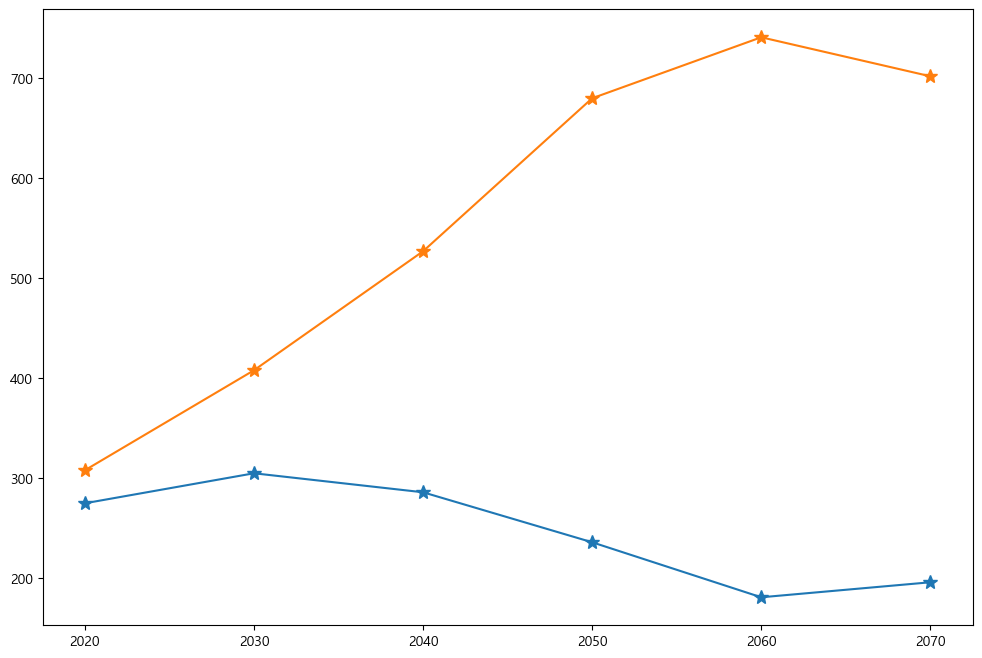

In [150]:
plt.figure(figsize = (12, 8))
plt.plot(x, y1, marker = '*', ms = 10  )
plt.plot(x, y2, marker = '*', ms = 10  )
plt.show()

In [137]:
# 한글 출력하기 위해 설정
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

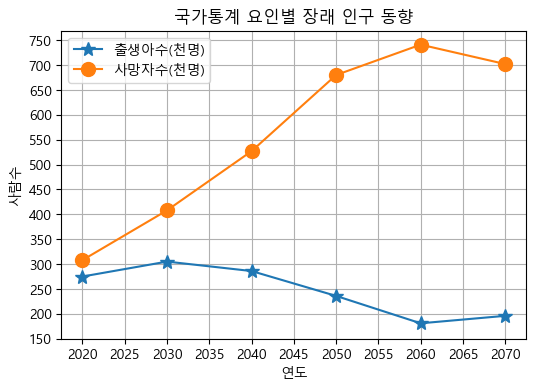

In [140]:
plt.figure(figsize = (6,4))
plt.plot(x,y1, marker = '*',ms = 10,label='출생아수(천명)')
plt.plot(x,y2, marker = 'o',ms = 10,label='사망자수(천명)')
plt.title('국가통계 요인별 장래 인구 동향')
plt.legend()
plt.grid()
plt.xlabel('연도')
plt.ylabel('사람수')
plt.xticks(range(2020,2071,5))
plt.yticks(range(150,751,50))
plt.show()

### Bar chart
- 막대그래프

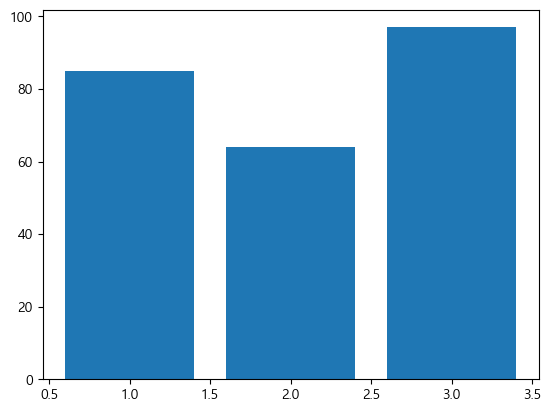

In [144]:
bar_x = np.arange(1, 4)
np.random.seed(5)
bar_y = np.random.randint(50, 100, size = 3)

plt.bar(bar_x, bar_y)
plt.show()

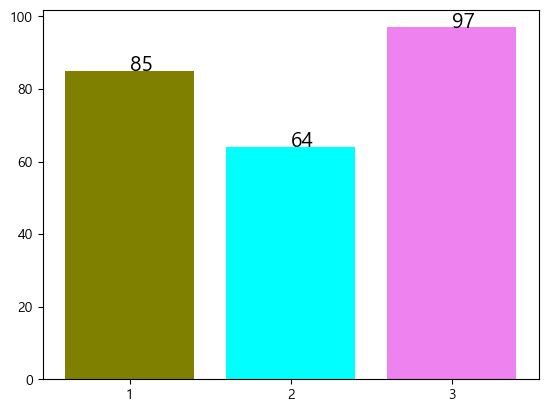

In [149]:
# 그래프 옵션 추가
# 막대그래프 색상 변경, 텍스트 출력 
plt.bar(bar_x, bar_y, color = ['olive', 'cyan', 'violet']) # 막대별 색상
for i in range(len(bar_x)) :
    plt.text(bar_x[i], bar_y[i], f'{bar_y[i]}', fontdict = {'color' : 'black', 'size' : 15})

plt.xticks(range(1, 4))
plt.show()

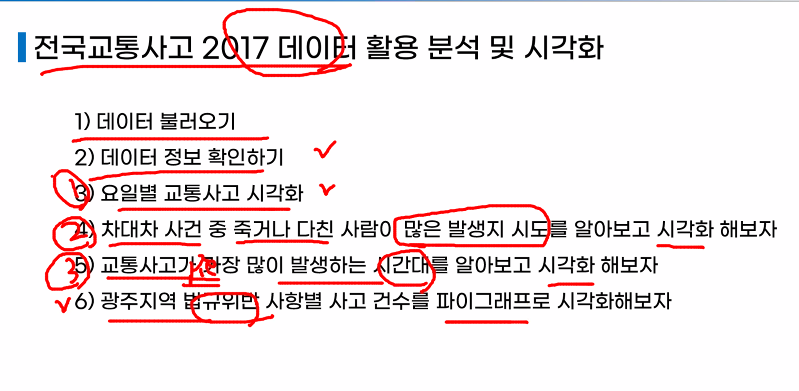

### 최종 예제 : 전국 교통사고(2017) 데이터 시각화
- 요일별 교통사고 시각화 - bar
- 차대차 사건 중 죽거나 다친 사람이 많은 발생지 시도 시각화 - bar
- 교통사고가 많이 발생하는 시간대 시각화 - pie
- 광주지역 법규위반 사항별 사고건수 시각화 - pie


In [151]:
# 전체 컬럼을 생략없이 모두 보기 설정
pd.set_option('display.max_columns', None)

In [152]:
# 데이터 불러오기
acc_data = pd.read_csv('./data/Traffic_Accident_2017.csv', encoding='euc-kr')
acc_data.head(3)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,전남,장성군,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,서울,송파구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,충남,홍성군,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [155]:
# 데이터 정보 확인
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

#### 요일별 교통사고 건수 시각화

In [159]:
day = acc_data['요일'].value_counts()
day = day[['월', '화', '수', '목', '금', '토', '일']]
day

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

In [160]:
display(sns.color_palette('tab10'))
display(sns.color_palette("husl",10))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775)]

In [163]:
# warning 없애기
import warnings
warnings.filterwarnings(action = 'ignore')

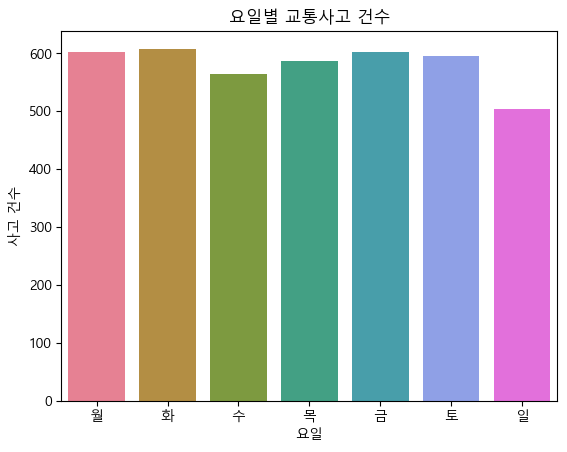

In [165]:
sns.barplot(day.index, day, palette = "husl" ) # x = day.index, y = day
plt.title('요일별 교통사고 건수')
plt.ylabel('사고 건수')
plt.xlabel('요일')

plt.show()

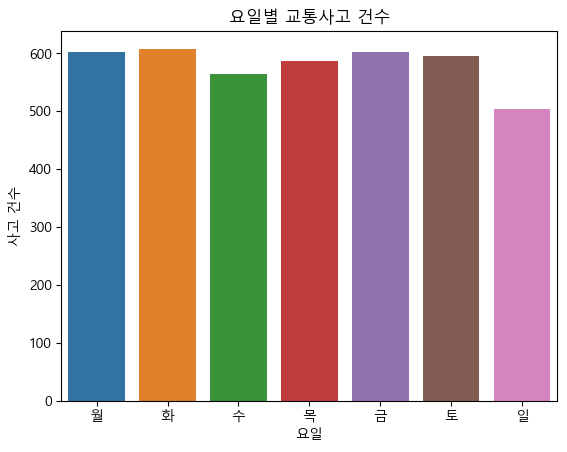

In [166]:
sns.barplot(day.index, day) # x = day.index, y = day
plt.title('요일별 교통사고 건수')
plt.ylabel('사고 건수')
plt.xlabel('요일')

plt.show()

#### 차대차 사건중 사상자수가 많은 발생지 시도 시각화

In [174]:
acc_data.columns

Index(['발생년', '발생년월일시', '발생분', '주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '법규위반_대분류',
       '법규위반', '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_1당', '당사자종별_2당_대분류',
       '당사자종별_2당', '발생위치X_UTMK', '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [169]:
np.unique(acc_data['사고유형_대분류'])

array(['차대사람', '차대차', '차량단독', '철길건널목'], dtype=object)

In [173]:
car_acc = acc_data.query('사고유형_대분류 == "차대차"')
car_acc

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,전남,장성군,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
2,2017,2017010102,43,야간,일,1,2,0,1,0,충남,홍성군,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
8,2017,2017010118,33,야간,일,1,3,1,1,0,제주,서귀포시,차대차,측면충돌,측면충돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,화물차,화물차,922514,1476665,126.667913,33.278582
9,2017,2017010120,0,야간,일,1,7,4,2,0,충남,공주시,차대차,기타,기타,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,승용차,승용차,962530,1823895,127.082074,36.411838
17,2017,2017010209,0,주간,월,1,2,1,0,0,경북,청송군,차대차,측면충돌,측면충돌,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,승용차,승용차,승용차,1134705,1810932,128.999992,36.286293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,2017,2017123009,58,주간,토,1,1,0,0,0,경남,하동군,차대차,정면충돌,정면충돌,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,승용차,건설기계,건설기계,1030259,1674021,127.831845,35.060801
4055,2017,2017123023,50,야간,토,1,6,2,3,0,광주,동구,차대차,정면충돌,정면충돌,운전자법규위반,중앙선 침범,단일로,기타단일로,승용차,승용차,승용차,승용차,948703,1679181,126.937322,35.106089
4058,2017,2017123112,10,주간,일,1,1,0,0,0,경북,경산시,차대차,기타,기타,운전자법규위반,교차로 통행방법 위반,교차로,교차로부근,이륜차,이륜차,승합차,승합차,1111054,1758873,128.729654,35.820218
4060,2017,2017123118,10,야간,일,1,4,1,0,2,경남,사천시,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774


In [178]:
s_car_acc = car_acc[['발생지시도', '사상자수']].groupby('발생지시도', as_index = False).sum()
s_car_acc

,발생지시도,사상자수
0,강원,214
1,경기,824
2,경남,248
3,경북,287
4,광주,87
5,대구,115
6,대전,61
7,부산,107
8,서울,197
9,세종,17


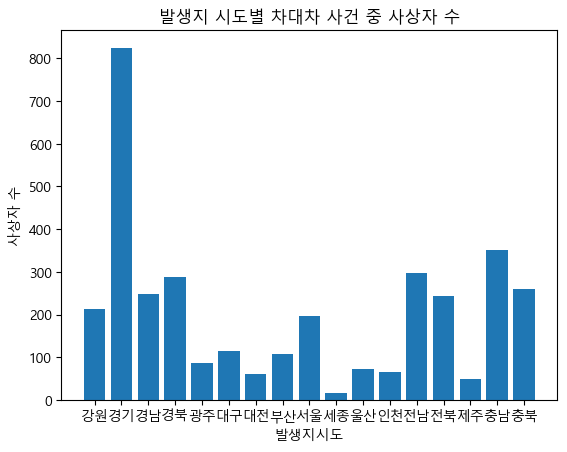

In [180]:
# 시각화
plt.bar(s_car_acc['발생지시도'], s_car_acc['사상자수'])
plt.title('발생지 시도별 차대차 사건 중 사상자 수')
plt.ylabel('사상자 수')
plt.xlabel('발생지시도')

plt.show()

#### pie chart

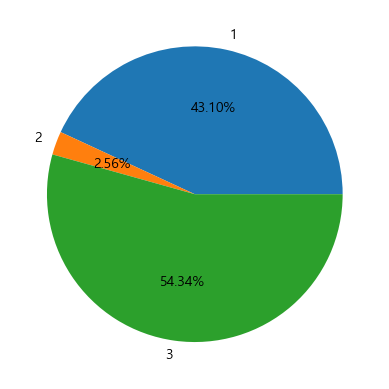

In [182]:
np.random.seed(2)
x=np.arange(1,4)
y=np.random.rand(3)

plt.pie(y, labels = x, autopct= '%.2f%%')
plt.show()

#### 교통사고가 가장 많이 발생하는 시간대 시각화

In [186]:
acc_time = acc_data['발생년월일시'] % 100 # 가장 마지막의 시간을 꺼내기위해 % 연산

In [190]:
acc_time.value_counts()
acc_time.value_counts().sort_index()
acc_time_cnt = acc_time.value_counts().sort_index()
acc_time_cnt

0     167
1     128
2     126
3     105
4     159
5     180
6     196
7     130
8     140
9     171
10    173
11    182
12    141
13    158
14    173
15    182
16    170
17    198
18    271
19    230
20    191
21    169
22    151
23    174
Name: 발생년월일시, dtype: int64

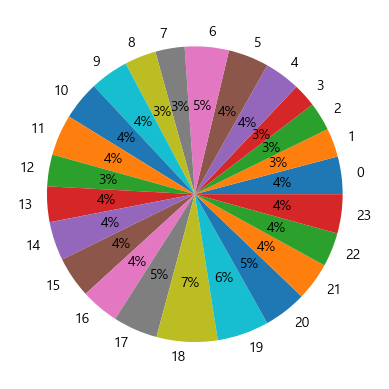

In [197]:
# 파이차트 시각화
plt.pie(acc_time_cnt, labels = acc_time_cnt.index, autopct='%1.0f%%')
plt.show()

In [199]:
# cut함수를 이용하여 시간대를 8개의 카테고리로 나눠서 시각화
# 0~2, 3~5, 6~8, 9~11, 12~14, 15~17, 18~20, 21~ 23   : 24 구간을 8구간으로 
bins = [-1, 2, 5, 8, 11, 14, 17, 20, 23]
labels = ['0~2', '3~5', '6~8', '9~11', '12~14', '15~17', '18~20', '21~ 23']

acc_time2 = pd.cut(acc_time, bins = bins, labels = labels)
acc_time2_cnt = acc_time2.value_counts() 
acc_time2_cnt

18~20     692
15~17     550
9~11      526
21~ 23    494
12~14     472
6~8       466
3~5       444
0~2       421
Name: 발생년월일시, dtype: int64

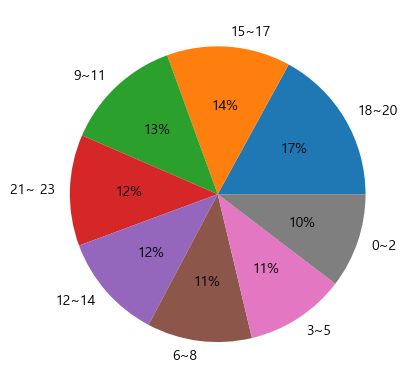

In [201]:
# %1.0f%% - 정수형 
plt.pie(acc_time2_cnt, labels = acc_time2_cnt.index, autopct='%1.0f%%')
plt.show()

#### 광주지역 법규위반 사항별 사고건수 시각화


In [204]:
gj_data=acc_data.query('발생지시도 == "광주"')
gj_data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반_대분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
7,2017,2017010109,25,주간,일,1,5,3,1,0,광주,북구,차량단독,도로이탈,도로이탈 추락,운전자법규위반,안전운전 의무 불이행,단일로,교량위,화물차,화물차,없음,없음,942432,1692541,126.867385,35.226601
80,2017,2017010800,5,야간,일,1,2,0,1,0,광주,서구,차대사람,횡단중,횡단중,운전자법규위반,과속,단일로,기타단일로,승용차,승용차,보행자,보행자,941740,1685408,126.860230,35.162414
102,2017,2017011012,10,주간,화,1,9,3,5,0,광주,서구,차대사람,기타,기타,운전자법규위반,과속,단일로,기타단일로,승용차,승용차,보행자,보행자,944138,1684066,126.886705,35.150281
144,2017,2017011423,6,야간,토,1,3,2,0,0,광주,북구,차대사람,횡단중,횡단중,운전자법규위반,과속,단일로,기타단일로,승용차,승용차,보행자,보행자,941491,1686712,126.857459,35.173989
171,2017,2017011615,49,주간,월,1,1,0,0,0,광주,광산구,차대사람,횡단중,횡단중,운전자법규위반,중앙선 침범,교차로,교차로부근,승용차,승용차,보행자,보행자,935909,1682432,126.796947,35.134993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,2017,2017122211,15,주간,금,1,1,0,0,0,광주,동구,차대사람,횡단중,횡단중,운전자법규위반,보행자 보호의무 위반,교차로,교차로횡단보도내,화물차,화물차,보행자,보행자,948021,1681767,126.929479,35.129760
3984,2017,2017122419,10,야간,일,1,1,0,0,0,광주,남구,차대차,추돌,추돌,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,자전거,자전거,945595,1683147,126.902761,35.142075
3994,2017,2017122522,34,야간,월,1,1,0,0,0,광주,남구,차대차,측면충돌,측면충돌,운전자법규위반,안전운전 의무 불이행,교차로,교차로내,승용차,승용차,이륜차,이륜차,946097,1683400,126.907778,35.144050
4011,2017,2017122702,40,야간,수,1,1,0,0,0,광주,북구,차대사람,횡단중,횡단중,운전자법규위반,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차,보행자,보행자,948604,1685309,126.935657,35.161727


In [208]:
display(gj_data['법규위반'])

display(gj_data['법규위반'].value_counts())


7       안전운전 의무 불이행
80               과속
102              과속
144              과속
171          중앙선 침범
           ...     
3955    보행자 보호의무 위반
3984    안전운전 의무 불이행
3994    안전운전 의무 불이행
4011    안전운전 의무 불이행
4055         중앙선 침범
Name: 법규위반, Length: 117, dtype: object

안전운전 의무 불이행        70
신호위반               14
과속                 12
중앙선 침범              8
보행자 보호의무 위반         6
안전거리 미확보            2
기타(운전자법규위반)         2
앞지르기 방법위반           1
부당한 회전              1
직진 및 우회전차의 통행방해     1
Name: 법규위반, dtype: int64

In [210]:
gj_data2 = gj_data['법규위반'].value_counts()

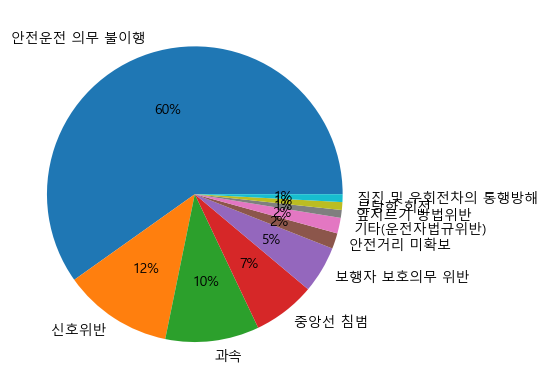

In [212]:
plt.pie(gj_data2, labels = gj_data2.index, autopct='%1.0f%%')
plt.show()

In [ ]:
plt.figure(figsize = (10, 10))